In [2]:
import pygad
import numpy as np
import sys

In [28]:
k1_x = 0
k4_x = 4

def Bx(t, k2_x, k3_x):
    return ((1-t)**3)*k1_x + 3*t*((1-t)**2)*k2_x + 3*(t**2)*(1-t)*k3_x + (t**3)*k4_x

def Bx_inv(x, k2_x, k3_x):
    for t in range(10000):
        if abs(Bx(t/10000, k2_x, k3_x) - x) <= 0.01 : return t/10000
    raise RuntimeError("No inverse found.")

def By(t, k1_y, k2_y, k3_y, k4_y):
    return ((1-t)**3)*k1_y + 3*t*((1-t)**2)*k2_y + 3*(t**2)*(1-t)*k3_y + (t**3)*k4_y

def fitfunc(ga_instance, solution, solution_idx):
    k1_y = solution[0]
    k2_x = solution[1]
    k2_y = solution[2]
    k3_x = solution[3]
    k3_y = solution[4]
    k4_y = solution[5]

    return  - ((By(Bx_inv(1,k2_x, k3_x), k1_y, k2_y, k3_y, k4_y) - 1)**2 + \
            (By(Bx_inv(2,k2_x, k3_x), k1_y, k2_y, k3_y, k4_y) - 2)**2 + \
            (By(Bx_inv(3,k2_x, k3_x), k1_y, k2_y, k3_y, k4_y) - 1)**2 + \
            (By(Bx_inv(3.5,k2_x, k3_x), k1_y, k2_y, k3_y, k4_y) - 1.5)**2)

function_inputs = 6

#solution = [-4, 1, 0, 3, -4, 0]
solution = [-4, 1, 0, 0, 4, 0]
fitfunc(None, solution, None)

-1.2696126334699929

In [29]:
fitness_function = fitfunc

num_generations = 500
num_parents_mating = 4

sol_per_pop = 8
num_genes = function_inputs

init_range_low = 0
init_range_high = 4

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 1

In [30]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

c:\Users\Agostino\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=1) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


In [31]:
ga_instance.run()

from math import sqrt

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=sqrt(sys.maxsize-solution_fitness)))

prediction = np.sum(np.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [-0.26327858  4.2533792   5.39150159  0.23957922 -1.85497807  1.94236652]
Fitness value of the best solution = 3037000499.97605
Predicted output based on the best solution : 58.251419345094114


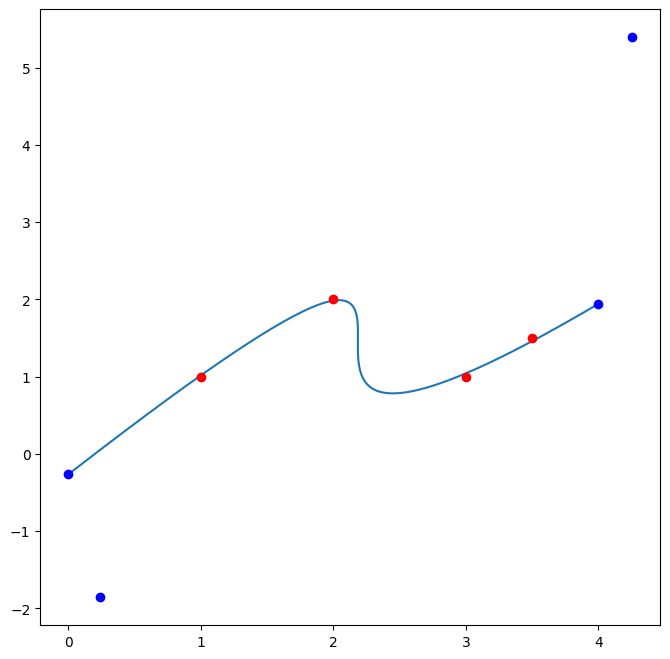

In [32]:
import matplotlib.pyplot as plt
from scipy.special import comb

def B(i, N, t):
    val = comb(N,i) * t**i * (1.-t)**(N-i)
    return val

def P(t, X):
    '''
     xx = P(t, X)
     
     Evaluates a Bezier curve for the points in X.
     
     Inputs:
      X is a list (or array) or 2D coords
      t is a number (or list of numbers) in [0,1] where you want to
        evaluate the Bezier curve
      
     Output:
      xx is the set of 2D points along the Bezier curve
    '''
    X = np.array(X)
    N,d = np.shape(X)   # Number of points, Dimension of points
    N = N - 1
    xx = np.zeros((len(t), d))
    
    for i in range(N+1):
        xx += np.outer(B(i, N, t), X[i])
    
    return xx

plt.figure(2, figsize=[8,8])
plt.clf()

k1_y = solution[0]
k2_x = solution[1]
k2_y = solution[2]
k3_x = solution[3]
k3_y = solution[4]
k4_y = solution[5]

c = [(k1_x, k1_y),
	 (k2_x, k2_y),
     (k3_x, k3_y),
     (k4_x, k4_y)]
    
X = np.array(c)

tt = np.linspace(0, 1, 200)
xx = P(tt, X)

plt.plot(xx[:,0], xx[:,1])
plt.plot(X[:,0], X[:,1], 'bo');

plt.plot(1, 1, 'ro');
plt.plot(2, 2, 'ro');
plt.plot(3, 1, 'ro');
plt.plot(3.5, 1.5, 'ro');